# Explore here

[{'name_song': 'Everlong', 'popularity': 84, 'duration_min': 4.175766666666667}, {'name_song': 'The Pretender', 'popularity': 80, 'duration_min': 4.48955}, {'name_song': 'Learn to Fly', 'popularity': 79, 'duration_min': 3.92155}, {'name_song': 'My Hero', 'popularity': 78, 'duration_min': 4.3337666666666665}, {'name_song': 'Best of You', 'popularity': 78, 'duration_min': 4.260433333333333}, {'name_song': 'All My Life', 'popularity': 75, 'duration_min': 4.390666666666666}, {'name_song': 'Monkey Wrench', 'popularity': 69, 'duration_min': 3.858}, {'name_song': 'Times Like These', 'popularity': 68, 'duration_min': 4.426}, {'name_song': 'Walk', 'popularity': 68, 'duration_min': 4.266}, {'name_song': 'Everlong - Acoustic Version', 'popularity': 68, 'duration_min': 4.181766666666666}]
                     name_song  popularity  duration_min
7             Times Like These          68      4.426000
8                         Walk          68      4.266000
9  Everlong - Acoustic Version          6

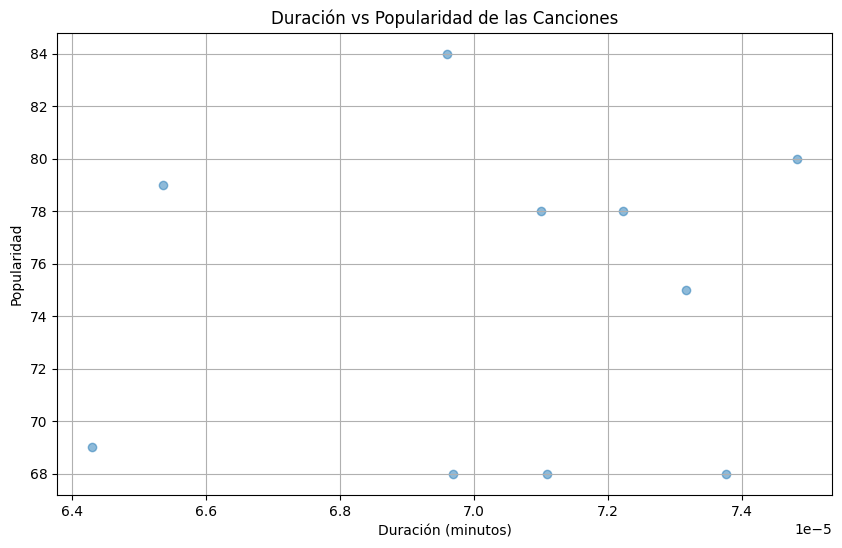

In [18]:
import os
import pandas as pd
from dotenv import load_dotenv
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import matplotlib.pyplot as plt

# load the .env file variables
load_dotenv()

client_id = os.environ.get("CLIENT_ID")
client_secret = os.environ.get("CLIENT_SECRET")



#con = spotipy.Spotify(auth_manager = SpotifyClientCredentials(client_id = client_id, client_secret = client_secret))
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)
# creo la variable con el id de mi artista y uso metodo top track

my_fav = "7jy3rLJdDQY21OgRLCZ9sD"
my_fav_name = "Foo Fighters"
response = sp.artist_top_tracks("7jy3rLJdDQY21OgRLCZ9sD")

tracks = []
for track in response['tracks']:
    name_song = track['name']
    popularity = track['popularity']
    duration_ms = track ["duration_ms"]
    duration_min = duration_ms / 60000
    tracks.append({'name_song': name_song, 'popularity': popularity, 'duration_min': duration_min})

tracks.sort(key=lambda x: x['popularity'], reverse=True)
print(tracks)

#bueno create el dataframe  pongo los 3 mejors 
df = pd.DataFrame(tracks)
df_sorted = df.sort_values(by="popularity")
top_3 = df_sorted.head(3)
print(top_3)


#grafico 

df['duration_min'] = df['duration_min'] / 60000  

# Crear el scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['duration_min'], df['popularity'], alpha=0.5)
plt.title('Duración vs Popularidad de las Canciones')
plt.xlabel('Duración (minutos)')
plt.ylabel('Popularidad')
plt.grid(True)
plt.show()

In [ ]:
#no se ve una clara relacion entre duracion de la cancion y popularidad de la misma
